         Date        Open        High         Low       Close   Adj Close  \
0  2019-03-11  227.529999  237.449997  227.059998  233.600006  214.101791   
1  2019-03-18  233.580002  240.339996  233.490005  237.559998  217.731277   
2  2019-03-25  236.929993  242.440002  235.789993  242.139999  221.928970   
3  2019-04-01  243.070007  247.089996  240.309998  245.869995  225.347626   
4  2019-04-08  245.990005  246.830002  240.899994  241.949997  221.754822   

     Volume  
0  16192400  
1   8577800  
2   7266000  
3   7784000  
4   9158400  
             Open        High         Low       Close   Adj Close  \
count  262.000000  262.000000  262.000000  262.000000  262.000000   
mean   429.618549  440.168969  421.063741  431.570115  413.635681   
std    120.828715  123.867831  118.413810  121.418614  125.147308   
min    227.529999  237.449997  227.059998  233.600006  214.101791   
25%    313.227493  320.657501  304.980003  314.552505  290.637871   
50%    449.804993  462.110001  441.0350

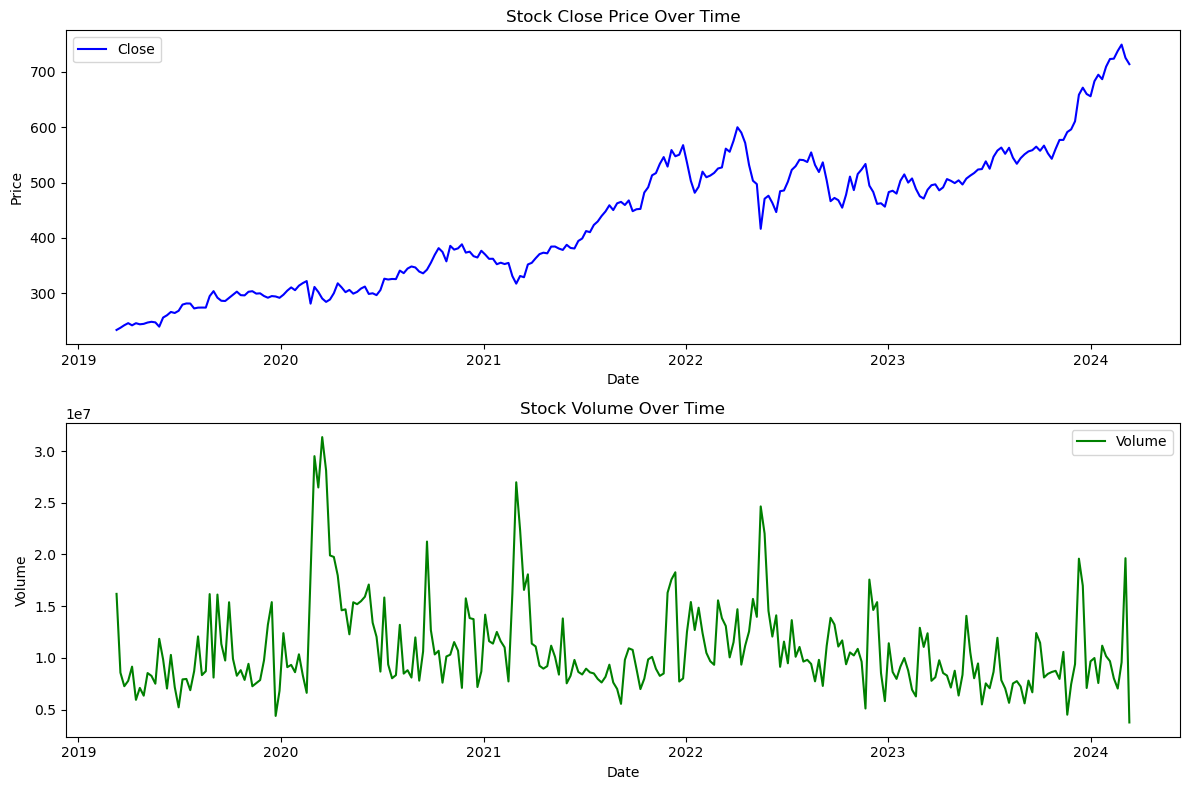

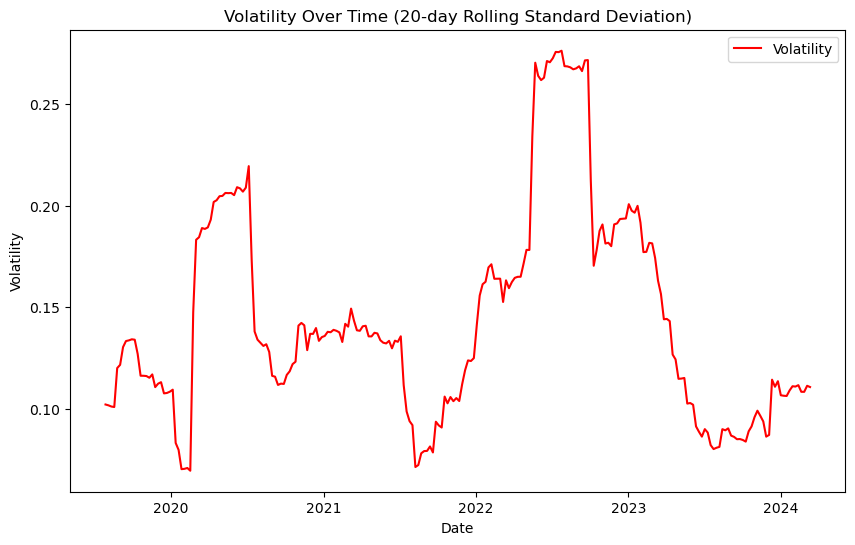

Correlation between Volume and Close Price: -0.15132945721298244


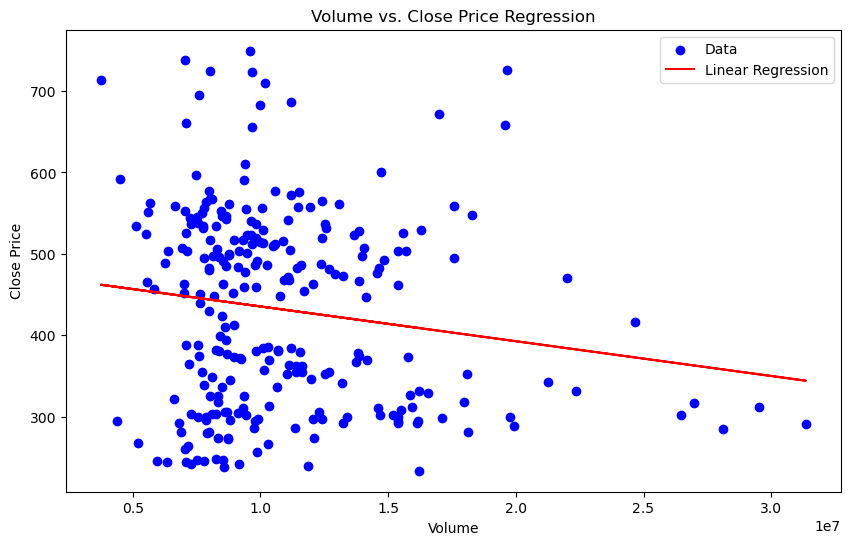

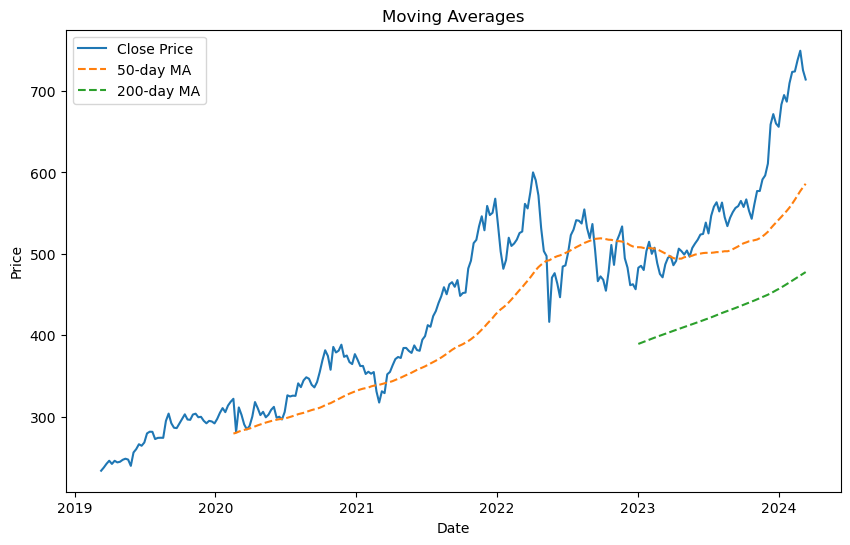

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

# Load the data into a DataFrame
file_path = '../data/COST.csv'  
stock_data = pd.read_csv(file_path)

# Data Exploration
print(stock_data.head())
print(stock_data.describe())

# Data Preprocessing
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.set_index('Date', inplace=True)

# Visualizing Stock Prices and Volume
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(stock_data.index, stock_data['Close'], label='Close', color='blue')
plt.title('Stock Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(stock_data.index, stock_data['Volume'], label='Volume', color='green')
plt.title('Stock Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

# Calculate Returns and Volatility
stock_data['Return'] = stock_data['Close'].pct_change()
stock_data['Volatility'] = stock_data['Return'].rolling(window=20).std() * np.sqrt(20)

# Plot Volatility
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Volatility'], label='Volatility', color='red')
plt.title('Volatility Over Time (20-day Rolling Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

# Calculate Correlation between Volume and Price
correlation, _ = pearsonr(stock_data['Volume'], stock_data['Close'])
print(f"Correlation between Volume and Close Price: {correlation}")

# Regression Analysis
X = stock_data['Volume'].values.reshape(-1, 1)
y = stock_data['Close'].values.reshape(-1, 1)
model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# Plot Regression Line
plt.figure(figsize=(10, 6))
plt.scatter(stock_data['Volume'], stock_data['Close'], color='blue', label='Data')
plt.plot(stock_data['Volume'], predictions, color='red', label='Linear Regression')
plt.title('Volume vs. Close Price Regression')
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Identify Trading Signals with Moving Averages
stock_data['50_MA'] = stock_data['Close'].rolling(window=50).mean()
stock_data['200_MA'] = stock_data['Close'].rolling(window=200).mean()

# Plotting Moving Averages
plt.figure(figsize=(10, 6))
plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
plt.plot(stock_data.index, stock_data['50_MA'], label='50-day MA', linestyle='--')
plt.plot(stock_data.index, stock_data['200_MA'], label='200-day MA', linestyle='--')
plt.title('Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Additional Analysis (e.g., MACD, RSI, etc.) could be included here based on specific requirements.
